In [1]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [2]:
features = np.array([[2, 3], [2,3], [2,3]])

In [3]:
def add_ten(x):
    return x + 10

In [4]:
ten_transformer = FunctionTransformer(add_ten)

In [5]:
ten_transformer.transform(features)

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[12, 13],
       [12, 13],
       [12, 13]])

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(features, columns=['feature_1', 'feature_2'])

In [9]:
df.apply(add_ten)

feature_1  feature_2
0         12         13
1         12         13
2         12         13

In [11]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [12]:
features, _ = make_blobs(n_samples = 10,
                        n_features = 2,
                        centers = 1,
                        random_state = 1)

In [13]:
features[0,0] = 10000
features[0,1] = 10000

In [14]:
outlier_detector = EllipticEnvelope(contamination=.1)

In [15]:
outlier_detector.fit(features)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [16]:
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [17]:
feature = features[:,0]

In [18]:
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

In [19]:
indicies_of_outliers(feature)

(array([0]),)

In [20]:
houses = pd.DataFrame()
houses['price'] = [534433, 392333, 293222, 4322032]
houses['bathrooms'] = [2, 3.5, 2, 116]
houses['square feet'] = [1500, 2500, 1500, 48000]

houses.head()

price  bathrooms  square feet
0   534433        2.0         1500
1   392333        3.5         2500
2   293222        2.0         1500
3  4322032      116.0        48000

In [21]:
houses[houses['bathrooms'] < 20]

price  bathrooms  square feet
0  534433        2.0         1500
1  392333        3.5         2500
2  293222        2.0         1500

In [22]:
houses['outlier'] = np.where(houses['bathrooms'] < 20, 0, 1)

In [23]:
houses

price  bathrooms  square feet  outlier
0   534433        2.0         1500        0
1   392333        3.5         2500        0
2   293222        2.0         1500        0
3  4322032      116.0        48000        1

In [24]:
houses['log_of_sq_feet'] = [np.log(x) for x in houses['square feet']]

In [25]:
houses

price  bathrooms  square feet  outlier  log_of_sq_feet
0   534433        2.0         1500        0        7.313220
1   392333        3.5         2500        0        7.824046
2   293222        2.0         1500        0        7.313220
3  4322032      116.0        48000        1       10.778956

In [26]:
from sklearn.preprocessing import Binarizer

In [28]:
age = np.array([[6], [12], [20], [36], [65]])

In [29]:
binarizer = Binarizer(18)

In [30]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [31]:
np.digitize(age, bins=[20, 30, 64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [32]:
from sklearn.cluster import KMeans

In [34]:
features, _ = make_blobs(n_samples = 50, n_features = 2, centers = 3, random_state = 1)

In [35]:
dataframe = pd.DataFrame(features, columns = ['feature_1', 'feature_2'])

In [37]:
clusterer = KMeans(3, random_state=0)
clusterer.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [38]:
dataframe['group'] = clusterer.predict(features)

In [39]:
dataframe.head()

feature_1  feature_2  group
0  -9.877554  -3.336145      0
1  -7.287210  -8.353986      2
2  -6.943061  -7.023744      2
3  -7.440167  -8.791959      2
4  -6.641388  -8.075888      2

In [41]:
features = np.array([[1.1, 11.1],
                   [2.2, 22.2],
                   [3.3, 33.3],
                   [4.4, 44.4],
                   [np.nan, 55]])

In [42]:
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [43]:
dataframe.dropna()

feature_1  feature_2  group
0   -9.877554  -3.336145      0
1   -7.287210  -8.353986      2
2   -6.943061  -7.023744      2
3   -7.440167  -8.791959      2
4   -6.641388  -8.075888      2
5   -0.794152   2.104951      1
6   -2.760179   5.551214      1
7   -9.946905  -4.590344      0
8   -0.525790   3.306599      1
9   -1.981977   4.022436      1
10  -5.865964  -7.968072      2
11  -6.834787  -7.391217      2
12  -6.749247 -10.175429      2
13 -10.752110  -2.700480      0
14  -8.508996  -8.657694      2
15  -2.330806   4.393825      1
16  -0.197452   2.346349      1
17   0.085252   3.645283      1
18 -10.206607  -3.366725      0
19  -9.158729  -3.022246      0
20  -1.340521   4.157119      1
21  -1.831988   3.528631      1
22  -9.806797  -1.853093      0
23  -0.758704   3.722762      1
24 -11.140231  -4.302691      0
25  -7.812137  -5.349845      2
26  -2.351221   4.009736      1
27  -6.878321  -7.743176      2
28  -1.782450   3.470720      1
29  -7.371086  -7.325253      2
30  -7.735544  -7.775664      2
31 -11.115023  -3.718933      0
32  -9.697542  -4.305598      0
33 -10.189548  -4.840978      0
34  -2.187732   3.333521      1
35  -2.346733   3.561284      1
36  -1.927448   4.936845      1
37 -10.744871  -2.260894      0
38  -6.866582  -8.034219      2
39  -7.512011  -6.928720      2
40  -6.904845  -7.277059      2
41  -1.617346   4.989305      1
42  -0.757969   4.908984      1
43  -9.484783  -4.251441      0
44  -7.408736  -8.109631      2
45  -9.509194  -4.028920      0
46  -8.337910  -3.211304      0
47  -9.712125  -3.068207      0
48  -8.866083  -2.433532      0
49  -7.684883  -7.455196      2

In [45]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [46]:
features, _ = make_blobs(n_samples = 1000, n_features = 2, random_state = 1)

In [47]:
mean_imputer = Imputer(strategy='mean', axis=0)

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
features_mean_imputed = mean_imputer.fit_transform(features)

In [49]:
print('tru value', true_value)
print('imputed value', features_mean_imputed[0,0])

NameError: name 'true_value' is not defined

In [50]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [51]:
feature = np.array([['Texas'], ['California'], ['Texas'],
                   ['Delaware'], ['Texas']])

In [52]:
one_hot = LabelBinarizer()

In [53]:
one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [54]:
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [55]:
one_hot.inverse_transform(one_hot.transform(feature))

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

In [56]:
pd.get_dummies(feature[:, 0])

California  Delaware  Texas
0           0         0      1
1           1         0      0
2           0         0      1
3           0         1      0
4           0         0      1

In [57]:
multiclass_feature = [('Texas', 'Florida'),
                     ('Cali', 'Bama'),
                     ('Texas', 'Florida'),
                     ('Delaware', 'Florida'),
                     ('Texas', 'Alabama')]

In [58]:
one_hot_multiclass = MultiLabelBinarizer()

In [59]:
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1]])

In [60]:
one_hot_multiclass.classes_

array(['Alabama', 'Bama', 'Cali', 'Delaware', 'Florida', 'Texas'],
      dtype=object)

In [61]:
dataframe = pd.DataFrame({'Score': ['low', 'low', 'medium', 'medium', 'high']})

In [62]:
scale_mapper = {'low': 1,
               'medium': 2,
               'high': 3}

In [64]:
dataframe['Score'].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [65]:
from sklearn.feature_extraction import DictVectorizer

In [66]:
data_dict = [{'red': 2, 'blue': 4},
            {'red': 4, 'blue': 3},
            {'red':1, "yellow": 2},
            {'red': 2, 'yellow': 2}]

In [67]:
dictvectorizer = DictVectorizer(sparse=False)

In [68]:
features = dictvectorizer.fit_transform(data_dict)

In [69]:
features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

In [70]:
feature_names = dictvectorizer.get_feature_names()
feature_names

['blue', 'red', 'yellow']

In [71]:
pd.DataFrame(features, columns=feature_names)

blue  red  yellow
0   4.0  2.0     0.0
1   3.0  4.0     0.0
2   0.0  1.0     2.0
3   0.0  2.0     2.0

In [72]:
doc_1_word_count = {'red': 2, 'blue': 4}
doc_2_word_count = {'red': 4, 'blue': 3}
doc_3_word_count = {'red':1, "yellow": 2}
doc_4_word_count = {'red': 2, 'yellow': 2}

In [73]:
doc_word_counts = [doc_1_word_count, doc_2_word_count, doc_3_word_count, doc_4_word_count]

In [74]:
dictvectorizer.fit_transform(doc_word_counts)

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
x = np.array([[0, 2.1, 1.45],
             [1, 1.18, 1.33],
             [0, 1.22, 1.27],
             1, -.21, -1.19])

In [78]:
x_with_nan = np.array([[np.nan, .87, 1.31],
                      [np.nan, -.67, -.22]])

In [82]:
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(x[:,1:], x[:,0])

IndexError: too many indices for array

In [83]:
x_complete = np.vstack((x_with_nan, x))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [86]:
iris = load_iris()

In [87]:
features = iris.data

In [88]:
target = iris.target

In [89]:
features = features[40:, :]
target = target[40:]

In [90]:
target = np.where((target == 0), 0, 1)

In [91]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [92]:
weights = {0: .9, 1: 0.1}

In [93]:
RandomForestClassifier(class_weight = weights)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.9, 1: 0.1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [94]:
RandomForestClassifier(class_weight = 'balanced')

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [95]:
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

In [96]:
n_class0 = len(i_class0)
n_class1 = len(i_class1)

In [97]:
i_class1_downsampled = np.random.choice(i_class1, size = n_class0,
                                       replace = False)

In [99]:
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [100]:
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

In [101]:
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

In [102]:
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [103]:
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[5. , 3.5, 1.6, 0.6],
       [5. , 3.5, 1.6, 0.6],
       [4.8, 3. , 1.4, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3]])

In [1]:
text_data = ['   Interroban. By Aishwarya Henriette     ',
            'Parking and Going. By Karl Gautier',
            '    Today Is The Night. By Jarek Prakash   ']

In [3]:
strip_whitespace = [string.strip() for string in text_data]

In [4]:
strip_whitespace

['Interroban. By Aishwarya Henriette',
 'Parking and Going. By Karl Gautier',
 'Today Is The Night. By Jarek Prakash']

In [5]:
remove_periods = [string.replace('.', '') for string in strip_whitespace]

In [6]:
remove_periods

['Interroban By Aishwarya Henriette',
 'Parking and Going By Karl Gautier',
 'Today Is The Night By Jarek Prakash']

In [7]:
def capitalizer(string: str) -> str:
    return string.upper()

In [8]:
[capitalizer(string) for string in remove_periods]

['INTERROBAN BY AISHWARYA HENRIETTE',
 'PARKING AND GOING BY KARL GAUTIER',
 'TODAY IS THE NIGHT BY JAREK PRAKASH']

In [9]:
import re

In [10]:
def replace_letters_with_x(string: str) -> str:
    return re.sub(r'[a-zA-Z]', 'x', string)

In [11]:
[replace_letters_with_x(string) for string in remove_periods]

['xxxxxxxxxx xx xxxxxxxxx xxxxxxxxx',
 'xxxxxxx xxx xxxxx xx xxxx xxxxxxx',
 'xxxxx xx xxx xxxxx xx xxxxx xxxxxxx']

In [12]:
from bs4 import BeautifulSoup

In [13]:
html = """
        <div class= 'full name'><span style='font-weight:bold'>
        Masego</span> Azra</div>"
        """

In [14]:
soup = BeautifulSoup(html, "lxml")

In [17]:
soup.find("div", { "class" : "full_name" }).text

AttributeError: 'NoneType' object has no attribute 'text'

In [18]:
import unicodedata
import sys

In [19]:
text_data = ['Hi!!! I. Love. This. Song......',
            '100000% Agree!!! #LoveIT',
            'Right?!?!?1']

In [20]:
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                           if unicodedata.category(chr(i)).startswith('P'))

In [22]:
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '100000 Agree LoveIT', 'Right1']

In [37]:
from nltk.tokenize import word_tokenize

In [24]:
string = 'The science of today is the technology of tomorrow'

In [38]:
word_tokenize(string)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/mattmastin/nltk_data'
    - '/Users/mattmastin/anaconda3/nltk_data'
    - '/Users/mattmastin/anaconda3/share/nltk_data'
    - '/Users/mattmastin/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [28]:
from nltk.tokenize import sent_tokenize

In [29]:
string = 'The science of today is the technology of tomorrow. Tomorrow is today.'

In [35]:
sent_tokenize(string)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/mattmastin/nltk_data'
    - '/Users/mattmastin/anaconda3/nltk_data'
    - '/Users/mattmastin/anaconda3/share/nltk_data'
    - '/Users/mattmastin/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [33]:
from nltk.corpus import stopwords
import nltk

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattmastin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
tokenized_words = ['i', 'am', 'going']

In [40]:
stop_words = stopwords.words('english')

In [41]:
[word for word in tokenized_words if word not in stop_words]

['going']

In [42]:
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [43]:
from nltk.stem.porter import PorterStemmer

In [44]:
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']

In [45]:
porter = PorterStemmer()

In [46]:
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

In [47]:
from nltk import pos_tag
from nltk import word_tokenize

In [48]:
text_data = 'Chris loved outdoor running'

In [49]:
text_tagged = pos_tag(word_tokenize(text_data))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/mattmastin/nltk_data'
    - '/Users/mattmastin/anaconda3/nltk_data'
    - '/Users/mattmastin/anaconda3/share/nltk_data'
    - '/Users/mattmastin/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [50]:
[word for word, tag in text_tagged for tag in ['NN', 'NNS', 'NNP', 'NNPS']]

NameError: name 'text_tagged' is not defined

In [54]:
nltk.download('brown')
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

[nltk_data] Downloading package brown to
[nltk_data]     /Users/mattmastin/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [56]:
sentences = brown.tagged_sents(categories='news')

In [57]:
train = sentences[:4000]
test = sentences[4000:]

In [58]:
unigram = UnigramTagger(train)
bigram = BigramTagger(train, backoff=unigram)
trigram = TrigramTagger(train, backoff=bigram)

In [59]:
trigram.evaluate(test)

0.8174734002697437

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [4]:
text_data = np.array(['I love Brazil, Brazil!',
                     'Sweden is best',
                     'Germany beats both!'])

In [5]:
count = CountVectorizer()

In [6]:
bag_of_words = count.fit_transform(text_data)

In [7]:
bag_of_words

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [8]:
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [10]:
count.get_feature_names()

['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love', 'sweden']

In [11]:
count_2gram = CountVectorizer(ngram_range=(1,2),
                             stop_words='english',
                             vocabulary=['brazil'])

In [12]:
bag = count_2gram.fit_transform(text_data)

In [13]:
bag.toarray()

array([[2],
       [0],
       [0]])

In [14]:
count_2gram.vocabulary_

{'brazil': 0}

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
text_data

array(['I love Brazil, Brazil!', 'Sweden is best', 'Germany beats both!'],
      dtype='<U22')

In [17]:
tfidf = TfidfVectorizer()

In [18]:
feature_matrix = tfidf.fit_transform(text_data)

In [19]:
feature_matrix

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [21]:
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [22]:
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

In [23]:
import pandas as pd

In [24]:
date_strings = np.array(['03-04-2005 11:35 PM',
                        '23-05-2010 12:01 AM',
                        '04-09-2009 09:09 PM'])

In [26]:
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [27]:
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='coerce')
for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [28]:
pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [32]:
date = pd.Timestamp('2017-05-01 06:00:00')

In [33]:
date_in_london = date.tz_localize('Europe/London')

In [34]:
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [35]:
date_in_london.tz_convert('Africa/Abidjan')

Timestamp('2017-05-01 05:00:00+0000', tz='Africa/Abidjan')

In [36]:
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

In [37]:
dates.dt.tz_localize('Africa/Abidjan')

0   2002-02-28 00:00:00+00:00
1   2002-03-31 00:00:00+00:00
2   2002-04-30 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

In [38]:
from pytz import all_timezones

In [39]:
all_timezones[0:2]

['Africa/Abidjan', 'Africa/Accra']

In [40]:
dataframe = pd.DataFrame()

In [41]:
dataframe['date'] = pd.date_range('1/1/2001', periods=10000, freq='H')

In [42]:
dataframe[(dataframe['date'] > '2002-1-1 01:00:00') &
         (dataframe['date'] <= '2002-1-1- 04:00:00')]

date
8762 2002-01-01 02:00:00
8763 2002-01-01 03:00:00
8764 2002-01-01 04:00:00

In [43]:
dataframe = dataframe.set_index(dataframe['date'])

In [44]:
dataframe.loc['2002-01-01 01:00:00': '2002-1-1 04:00:00']

date
date                                   
2002-01-01 01:00:00 2002-01-01 01:00:00
2002-01-01 02:00:00 2002-01-01 02:00:00
2002-01-01 03:00:00 2002-01-01 03:00:00
2002-01-01 04:00:00 2002-01-01 04:00:00

In [45]:
dataframe = pd.DataFrame()

In [46]:
dataframe['date'] = pd.date_range('1/1/2001', periods=150, freq='W')

In [47]:
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute

In [48]:
dataframe.head()

date  year  month  day  hour  minute
0 2001-01-07  2001      1    7     0       0
1 2001-01-14  2001      1   14     0       0
2 2001-01-21  2001      1   21     0       0
3 2001-01-28  2001      1   28     0       0
4 2001-02-04  2001      2    4     0       0

In [49]:
dataframe = pd.DataFrame()

In [52]:
dataframe['Arrived'] = [pd.Timestamp('1-1-2017'), pd.Timestamp('01-4-2017')]
dataframe['Left'] = [pd.Timestamp('1-1-2017'), pd.Timestamp('1-6-2017')]

In [53]:
dataframe['Left'] - dataframe['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [54]:
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

In [55]:
dates.dt.weekday_name

0    Thursday
1      Sunday
2     Tuesday
dtype: object

In [56]:
dates.dt.weekday

0    3
1    6
2    1
dtype: int64

In [57]:
dataframe = pd.DataFrame()

In [59]:
dataframe['dates'] = pd.date_range('1/1/2001', periods=5, freq='D')

In [60]:
dataframe['stock_price'] = [1.1, 2.2, 3.3, 4.4, 5.5]

In [61]:
dataframe['previous_days_stock_price'] = dataframe['stock_price'].shift(1)

In [62]:
dataframe

dates  stock_price  previous_days_stock_price
0 2001-01-01          1.1                        NaN
1 2001-01-02          2.2                        1.1
2 2001-01-03          3.3                        2.2
3 2001-01-04          4.4                        3.3
4 2001-01-05          5.5                        4.4

In [63]:
time_index = pd.date_range('01/01/2010', periods=5, freq='M')

In [64]:
dataframe = pd.DataFrame(index=time_index)

In [65]:
dataframe['stock_price'] = [1,2,3,4,5]

In [66]:
dataframe.rolling(window=2).mean()

stock_price
2010-01-31          NaN
2010-02-28          1.5
2010-03-31          2.5
2010-04-30          3.5
2010-05-31          4.5

In [67]:
time_index = pd.date_range('01/01/2010', periods=5, freq='M')

In [68]:
dataframe = pd.DataFrame(index=time_index)

In [69]:
dataframe['sales'] = [1.0, 2.0, np.nan, np.nan, 5.0]

In [70]:
dataframe.interpolate()

sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    3.0
2010-04-30    4.0
2010-05-31    5.0

In [71]:
dataframe.ffill()

sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    2.0
2010-04-30    2.0
2010-05-31    5.0

In [72]:
dataframe.bfill()

sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    5.0
2010-04-30    5.0
2010-05-31    5.0

In [77]:
pip install opencv-python

    100% |████████████████████████████████| 52.1MB 775kB/s eta 0:00:01    29% |█████████▍                      | 15.4MB 17.0MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install opencv-contrib-python

    100% |████████████████████████████████| 62.0MB 659kB/s eta 0:00:01    40% |████████████▉                   | 24.8MB 17.1MB/s eta 0:00:03    71% |███████████████████████         | 44.3MB 10.9MB/s eta 0:00:02    74% |███████████████████████▉        | 46.1MB 24.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [3]:
cv2.__version__

'4.1.0'

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
image = cv2.imread('desktop/plane.jpg', cv2.IMREAD_GRAYSCALE)

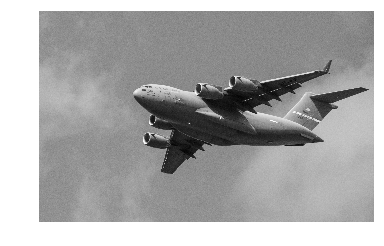

In [10]:
plt.imshow(image, cmap='gray'), plt.axis('off')
plt.show()

In [11]:
type(image)

numpy.ndarray

In [12]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [13]:
image.shape

(2270, 3600)

In [14]:
image[0,0]

140

In [22]:
image_bgr = cv2.imread('desktop/plane.jpg', cv2.IMREAD_COLOR)

In [19]:
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

In [20]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

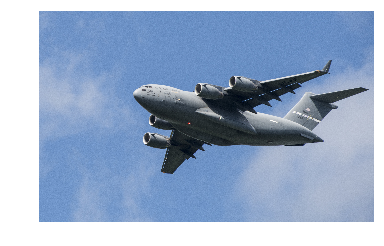

In [21]:
plt.imshow(image_rgb), plt.axis('off')
plt.show()

In [22]:
cv2.imwrite('desktop/plane_new.jpg', image)

True

In [23]:
image2 = cv2.imread('desktop/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [24]:
image_50x50 = cv2.resize(image2, (50,50))

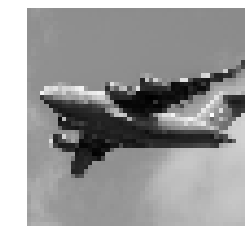

In [25]:
plt.imshow(image_50x50, cmap='gray'), plt.axis('off')
plt.show()

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('desktop/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
image_cropped = image[:, :128]

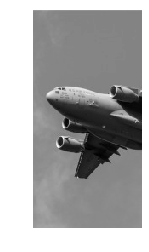

In [6]:
plt.imshow(image_cropped, cmap='gray'), plt.axis('off')
plt.show()

In [7]:
image = cv2.imread('desktop/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [8]:
image_blurry = cv2.blur(image, (5,5))

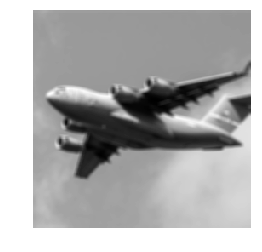

In [9]:
plt.imshow(image_blurry, cmap='gray'), plt.axis('off')
plt.show()

In [10]:
image_very_blurry = cv2.blur(image,(100,100))

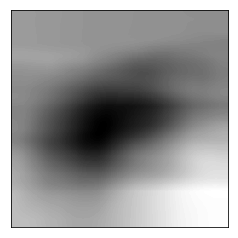

In [11]:
plt.imshow(image_very_blurry, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
kernel = np.ones((5,5)) / 25.0
image_kernel = cv2.filter2D(image, -1, kernel)

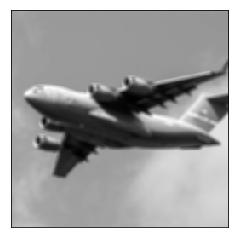

In [14]:
plt.imshow(image_kernel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [17]:
image_sharp = cv2.filter2D(image, -1, kernel)

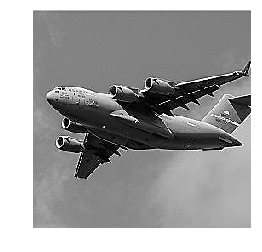

In [18]:
plt.imshow(image_sharp, cmap='gray'), plt.axis('off')
plt.show()

In [19]:
image_enhanced = cv2.equalizeHist(image)

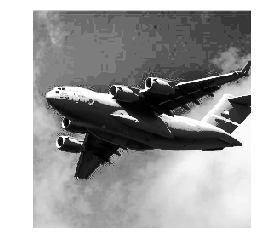

In [20]:
plt.imshow(image_enhanced, cmap='gray'), plt.axis('off')
plt.show()

In [23]:
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

In [25]:
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

In [26]:
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

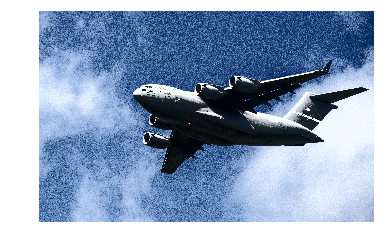

In [27]:
plt.imshow(image_rgb), plt.axis('off')
plt.show()

In [28]:
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

In [29]:
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

In [30]:
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

In [31]:
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

In [34]:
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

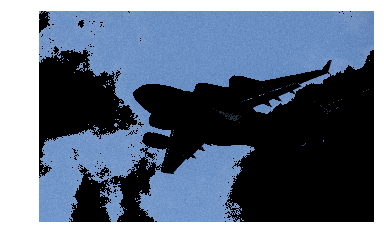

In [35]:
plt.imshow(image_rgb), plt.axis('off')
plt.show()

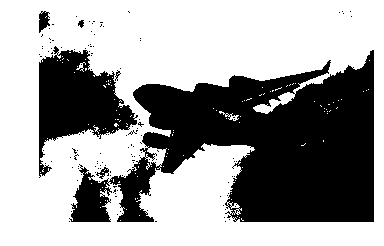

In [36]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

In [38]:
image_grey = cv2.imread('deskto/plan_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [40]:
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

In [43]:
plt.imshow(image_mean_threshold, cmap='gray'), plt.axis('off')
plt.show()

NameError: name 'image_mean_threshold' is not defined

In [44]:
image_bgr

array([[[195, 144, 111],
        [191, 140, 107],
        [201, 150, 117],
        ...,
        [187, 136, 103],
        [194, 143, 110],
        [189, 138, 105]],

       [[199, 148, 115],
        [191, 140, 107],
        [204, 153, 120],
        ...,
        [197, 146, 113],
        [179, 128,  95],
        [181, 130,  97]],

       [[207, 156, 123],
        [194, 143, 110],
        [199, 148, 115],
        ...,
        [176, 125,  92],
        [182, 131,  98],
        [189, 138, 105]],

       ...,

       [[211, 162, 124],
        [201, 152, 114],
        [201, 149, 112],
        ...,
        [189, 159, 140],
        [186, 156, 137],
        [183, 153, 134]],

       [[201, 152, 114],
        [205, 156, 118],
        [202, 153, 115],
        ...,
        [188, 158, 139],
        [190, 160, 141],
        [187, 160, 140]],

       [[200, 148, 111],
        [195, 143, 106],
        [204, 152, 115],
        ...,
        [188, 158, 139],
        [187, 160, 140],
        [187, 160, 140]]

In [45]:
image_rgb

array([[[111, 144, 195],
        [107, 140, 191],
        [117, 150, 201],
        ...,
        [103, 136, 187],
        [110, 143, 194],
        [105, 138, 189]],

       [[115, 148, 199],
        [107, 140, 191],
        [120, 153, 204],
        ...,
        [113, 146, 197],
        [ 95, 128, 179],
        [ 97, 130, 181]],

       [[123, 156, 207],
        [110, 143, 194],
        [115, 148, 199],
        ...,
        [ 92, 125, 176],
        [ 98, 131, 182],
        [105, 138, 189]],

       ...,

       [[124, 162, 211],
        [114, 152, 201],
        [112, 149, 201],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[114, 152, 201],
        [118, 156, 205],
        [115, 153, 202],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[111, 148, 200],
        [106, 143, 195],
        [115, 152, 204],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [46]:
rectangle = (0, 56, 256, 150)

In [47]:
mask = np.zeros(image_rgb.shape[:2], np.uint8)


In [48]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [49]:
cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1.60776256e-01, 5.05292607e-01, 1.26011196e-01, 1.90558829e-02,
         1.88864059e-01, 1.08866559e+02, 1.45541308e+02, 1.97438238e+02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01965049e+02,
         1.39629083e+02, 1.92120130e+02, 9.68993552e+01, 1.27913150e+02,
         1.74523230e+02, 1.17005665e+02, 1.52122842e+02, 2.01846475e+02,
         4.11919528e+00, 3.91854908e+00, 3.46313636e+00, 3.91854908e+00,
         4.17517224e+00, 4.29514072e+00, 3.46313636e+00, 4.29514072e+00,
         6.33035651e+00, 1.00000000e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.00000000e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.00000000e-02, 1.08528837e+01, 1.13029222e+01,
         1.09260422e+01, 1.13029222e+01, 1.3

In [51]:
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

In [52]:
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

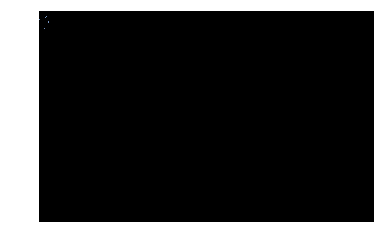

In [53]:
plt.imshow(image_rgb_nobg), plt.axis('off')
plt.show()

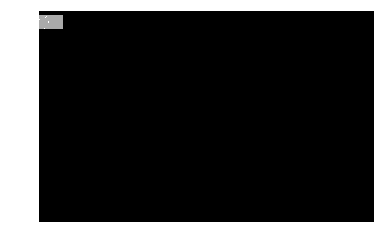

In [54]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_gray = cv2.imread('desktop/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
median_intensity = np.median(image_gray)

In [4]:
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(max(255, (1.0 + 0.33) * median_intensity))

In [5]:
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

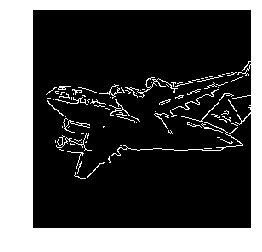

In [6]:
plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

In [7]:
image_bgr = cv2.imread('desktop/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)


In [8]:
block_size = 2
aperture = 29
free_parameter = 0.04

In [9]:
detector_responses = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter)

In [10]:
detector_responses = cv2.dilate(detector_responses, None)

In [11]:
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]

In [12]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

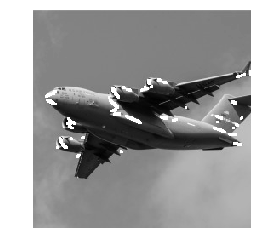

In [13]:
plt.imshow(image_gray, cmap='gray'), plt.axis('off')
plt.show()

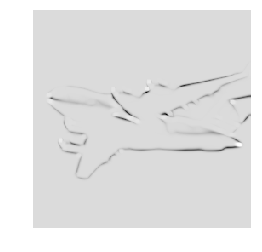

In [14]:
plt.imshow(detector_responses, cmap='gray'), plt.axis('off')
plt.show()

In [15]:
image_bgr = cv2.imread('desktop/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

In [16]:
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

In [17]:
corners = cv2.goodFeaturesToTrack(image_gray, corners_to_detect, minimum_quality_score, minimum_distance)

In [18]:
corners = np.float32(corners)

In [19]:
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255, 255, 255), -1)

In [20]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

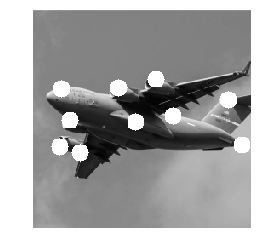

In [21]:
plt.imshow(image_rgb, cmap='gray'), plt.axis('off')
plt.show()

In [22]:
image = cv2.imread('desktop/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [23]:
IMAGE_10x10 = cv2.resize(image, (10,10))

In [24]:
IMAGE_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

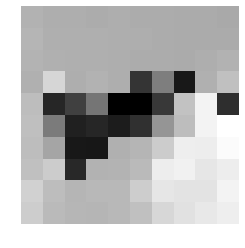

In [25]:
plt.imshow(IMAGE_10x10, cmap='gray'), plt.axis('off')
plt.show()

In [26]:
IMAGE_10x10.flatten().shape

(100,)

In [27]:
image_bgr = cv2.imread('desktop/plane_256x256.jpg', cv2.IMREAD_COLOR)

In [28]:
channels = cv2.mean(image_bgr)

In [29]:
observation = np.array([(channels[2], channels[1], channels[0])])

In [30]:
observation

array([[ 90.52377319, 133.11940002, 169.02355957]])

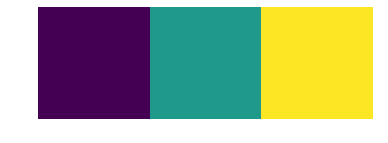

In [31]:
plt.imshow(observation), plt.axis('off')
plt.show()

In [33]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
features = []
colors = ('r', 'g', 'b')
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], [i], None,
                            [256], [0, 256])
    features.extend(histogram)

In [34]:
observation = np.array(features).flatten()

In [35]:
observation[0:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

In [36]:
import pandas as pd

In [37]:
data = pd.Series([1, 1, 2, 2, 3, 3, 4, 5])

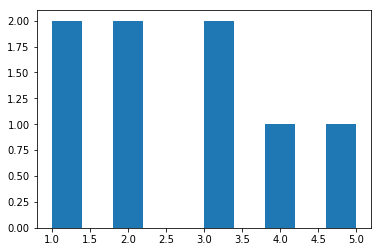

In [38]:
data.hist(grid=False)
plt.show()

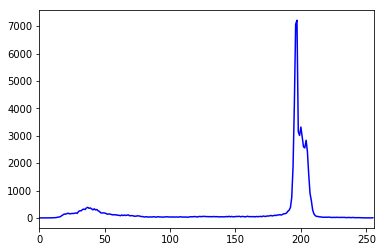

In [39]:
plt.plot(histogram, color = channel)
plt.xlim([0, 256])
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [41]:
digits = datasets.load_digits()

In [42]:
features = StandardScaler().fit_transform(digits.data)

In [43]:
pca = PCA(n_components=.99, whiten=True)

In [44]:
features_pca = pca.fit_transform(features)

In [45]:
print('original number of features:', features.shape[1])
print('reduced number of features:', features_pca.shape[1])

original number of features: 64
reduced number of features: 54


In [46]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [47]:
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

In [48]:
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)

In [49]:
features_kpca = kpca.fit_transform(features)

In [50]:
print('original features:', features.shape[1])
print('reduced features:', features_kpca.shape[1])

original features: 2
reduced features: 1


In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
iris = datasets.load_iris()

In [54]:
features = iris.data
target= iris.target

In [56]:
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

In [57]:
print('original features', features.shape[1])
print('reduced features', features_lda.shape[1])

original features 4
reduced features 1


In [58]:
lda.explained_variance_ratio_

array([0.9912126])

In [60]:
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

In [61]:
lda_var_ratios = lda.explained_variance_ratio_

In [63]:
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

In [64]:
select_n_components(lda_var_ratios, 0.95)

1

In [65]:
from sklearn.decomposition import NMF

In [66]:
digits = datasets.load_digits()

In [67]:
features = digits.data

In [68]:
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

In [69]:
print('original', features.shape[1])
print('reduced', features_nmf.shape[1])

original 64
reduced 10


In [70]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

In [71]:
features = StandardScaler().fit_transform(digits.data)

In [72]:
features_sparse = csr_matrix(features)

In [73]:
tsvd = TruncatedSVD(n_components=10)

In [74]:
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

In [75]:
print('original', features_sparse.shape[1])
print('reduced', features_sparse_tsvd.shape[1])

original 64
reduced 10


In [76]:
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

In [77]:
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [78]:
def select_n_components(var_ratio, goal_var):
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

In [79]:
select_n_components(tsvd_var_ratios, 0.95)

40

In [1]:
# dimensionality reduction using feature selection

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

In [2]:
iris = datasets.load_iris()

features = iris.data
target = iris.target

thresholder = VarianceThreshold(threshold=0.5)

features_high_variance = thresholder.fit_transform(features)

features_high_variance[0:3]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

In [3]:
thresholder.fit(features).variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

In [5]:
# thresholding binary feature variance

features = [[0,1,0],
           [0,1,1],
           [0,1,0],
           [0,1,1],
           [1,0,0]]

thresholder = VarianceThreshold(threshold=(0.75 * (1 - 0.75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [9]:
import pandas as pd
import numpy as np

features = np.array([[1,1,1],
                    [2,2,0],
                    [3,3,1],
                    [4,4,0],
                    [5,5,1],
                    [6,6,0],
                    [7,7,1],
                    [8,7,0],
                    [9,7,1]])

df = pd.DataFrame(features)
corr_matrix = df.corr().abs()
corr_matrix

0         1         2
0  1.000000  0.976103  0.000000
1  0.976103  1.000000  0.034503
2  0.000000  0.034503  1.000000

In [11]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                 k=1).astype(np.bool))
upper

0         1         2
0 NaN  0.976103  0.000000
1 NaN       NaN  0.034503
2 NaN       NaN       NaN

In [14]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(df.columns[to_drop], axis=1).head(3)

0  2
0  1  1
1  2  0
2  3  1

In [15]:
# removing irrelevant features for classification

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

features = iris.data
target = iris.target

# convert to categorical data
features = features.astype(int)
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

print('original # of features', features.shape[1])
print('reduced # of features', features_kbest.shape[1])

original # of features 4
reduced # of features 2


In [16]:
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

print('original # of features', features.shape[1])
print('reduced # of features', features_kbest.shape[1])

original # of features 4
reduced # of features 2


In [17]:
from sklearn.feature_selection import SelectPercentile

# select top 75% of features with highest F-values (varation between sample means)
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

print('original # of features', features.shape[1])
print('reduced # of features', features_kbest.shape[1])

original # of features 4
reduced # of features 3


In [23]:
# recursively eliminating features

import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model

warnings.filterwarnings(action='ignore', module='scipy',
                       message='^internal gelsd')

features, target = make_regression(n_samples=10000,
                                  n_features=100,
                                  n_informative=5)

osl = linear_model.LinearRegression()

In [24]:
rfecv = RFECV(estimator=osl, step=1, scoring='neg_mean_squared_error')
rfecv.fit(features, target)
rfecv.transform(features)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[ 0.37528399,  0.68339339, -1.80100487, ..., -0.91863895,
         0.74886232,  1.31157916],
       [-0.6712445 ,  0.02898374,  0.05971418, ..., -0.47577778,
         1.08481133,  0.25744562],
       [-1.65317739,  1.58995882, -0.42842907, ..., -1.94780537,
         0.71941613, -0.3360616 ],
       ...,
       [ 1.23882385,  0.26835181, -0.43594797, ...,  1.8437754 ,
         0.59576562,  1.05912793],
       [ 0.94599233,  0.66335339, -1.61434643, ...,  1.62908489,
         0.18793158, -2.7847885 ],
       [-0.42479367,  0.20770529, -1.54179374, ..., -1.31386611,
         0.96627119,  0.74878224]])

In [25]:
rfecv.n_features_

7

In [26]:
rfecv.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [27]:
# rank features form best to worst
rfecv.ranking_

array([ 7,  1, 80,  6, 93, 63, 59, 69, 26, 68, 23, 82, 94, 90, 75, 22, 66,
       58, 31,  9,  1, 43, 41, 42, 60, 35, 65, 13, 51, 77,  1,  3, 32, 29,
       64, 14, 54, 76, 19, 34, 53, 88, 21, 91,  4, 30,  1, 73,  1, 55, 27,
       85, 15, 87, 67,  2,  1, 62, 39, 79, 61, 74, 89, 48,  8, 52, 46, 81,
       36, 20, 12, 71, 10, 78, 18, 86, 47, 11, 45, 16, 25,  5, 57, 28, 17,
       40, 72, 49, 38, 44, 84, 37, 24,  1, 50, 92, 33, 70, 83, 56])

In [30]:
# model evaluation

from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

features = digits.data
target = digits.target

standardizer = StandardScaler()
logit = LogisticRegression()

pipeline = make_pipeline(standardizer, logit)

kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring='accuracy',
                            n_jobs=-1)

cv_results.mean()

0.964931719428926

In [31]:
cv_results

array([0.97222222, 0.97777778, 0.95555556, 0.95      , 0.95555556,
       0.98333333, 0.97777778, 0.96648045, 0.96089385, 0.94972067])

In [33]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
                features, target, test_size=0.1, random_state=1)

standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [34]:
# creating baseline regression model

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor

boston = load_boston()

features, target = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

-0.001119359203955339

In [36]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()

ols.fit(X_train, y_train)

ols.score(X_test, y_test)

0.6354638433202128

In [39]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier

iris = load_iris()

features, target = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.42105263157894735

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9473684210526315

In [42]:
# evaluating binary classifier predictions

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

logit = LogisticRegression()

cross_val_score(logit, X, y, scoring='accuracy')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

In [43]:
cross_val_score(logit, X, y, scoring='precision')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95252404, 0.96583282, 0.95558223])

In [44]:
cross_val_score(logit, X, y, scoring='recall')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95080984, 0.94961008, 0.95558223])

In [45]:
cross_val_score(logit, X, y, scoring='f1')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95166617, 0.95765275, 0.95558223])

In [47]:
# evaluating binary classifier thresholds

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                   test_size=0.1, random_state=1)

logit = LogisticRegression()

logit.fit(X_train, y_train)

target_proba = logit.predict_proba(X_test)[:, 1]

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
                                                              target_proba)

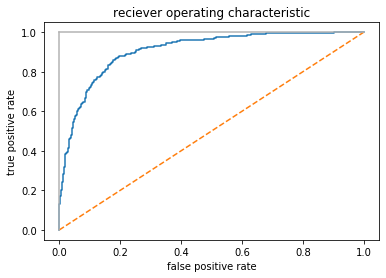

In [49]:
plt.title('reciever operating characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0,0], [1,0], c='0.7'), plt.plot([1,1], c='0.7')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show();

In [50]:
logit.predict_proba(X_test)[0:3]

array([[0.8688938 , 0.1311062 ],
       [0.46310704, 0.53689296],
       [0.03395223, 0.96604777]])

In [51]:
logit.classes_

array([0, 1])

In [52]:
print('threshold', threshold[116])
print('true positive rate', true_positive_rate[116])
print('false positive rate', false_positive_rate[116])

threshold 0.5332422684258306
true positive rate 0.810204081632653
false positive rate 0.14901960784313725


In [53]:
print('threshold', threshold[45])
print('true positive rate', true_positive_rate[45])
print('false positive rate', false_positive_rate[45])

threshold 0.8189599898953652
true positive rate 0.5448979591836735
false positive rate 0.047058823529411764


In [56]:
roc_auc_score(y_test, target_proba)

0.9073389355742297